In [26]:
# Download extra libraries
!pip install wordcloud



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# import necessary modules
from IPython.display import Image
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt	
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Graph Functions

In [28]:
def word_cloud(col):
	"""
	Takes in dataframe and plots a wordclous using matplotlib
	"""
	plt.subplots(figsize = (12,10))
	wordcloud = WordCloud(
							background_color = 'white',
							width = 1000,
							height = 800).generate(" ".join(col))
	plt.imshow(wordcloud)
	plt.axis('off')
	plt.show()


In [121]:
def create_bar_chart(serie,y,x, name):
    dist_val = serie.value_counts()
    dist_val.plot(kind='bar', xlabel=x, ylabel=y,title=name)
    

In [30]:
def create_pie_chart(panda_frame, label, count, title):
    # Create a pie chart
    
    panda_frame.plot(kind='pie', y=count, labels=panda_frame[label], autopct='%1.1f%%',figsize=(12, 12))

    # Add title
    plt.title(title)

    # Show the chart
    plt.show()

# Analysis

In [116]:
# Load JSON file into a Pandas DataFrame
streaming = pd.read_json('StreamingHistory1.json')
search_queries = pd.read_json('SearchQueries.json')
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [117]:
streaming.describe()

,msPlayed
count,3.372000e+03
mean,1.497198e+05
std,2.434860e+05
min,0.000000e+00
25%,9.306000e+03
50%,1.347610e+05
75%,1.910260e+05
max,5.078208e+06


In [32]:
search_queries.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,IPHONE_ARM64,2023-01-11T21:04:19.981Z[UTC],bla,[]
1,IPHONE_ARM64,2023-01-11T21:04:24.375Z[UTC],simply,[]
2,IPHONE_ARM64,2023-01-29T19:13:57.108Z[UTC],malo,[]
3,IPHONE_ARM64,2023-02-01T15:34:20.004Z[UTC],l’,[]
4,IPHONE,2023-02-01T15:34:21.141Z[UTC],l’appunt,[spotify:track:5PnEkOUOFnk0wMI71JwddQ]


In [118]:
search_queries.describe()

,platform,searchTime,searchQuery,searchInteractionURIs
count,40,40,40,40
unique,3,40,35,18
top,IPHONE,2023-01-11T21:04:19.981Z[UTC],i will survive,[]
freq,19,1,3,23


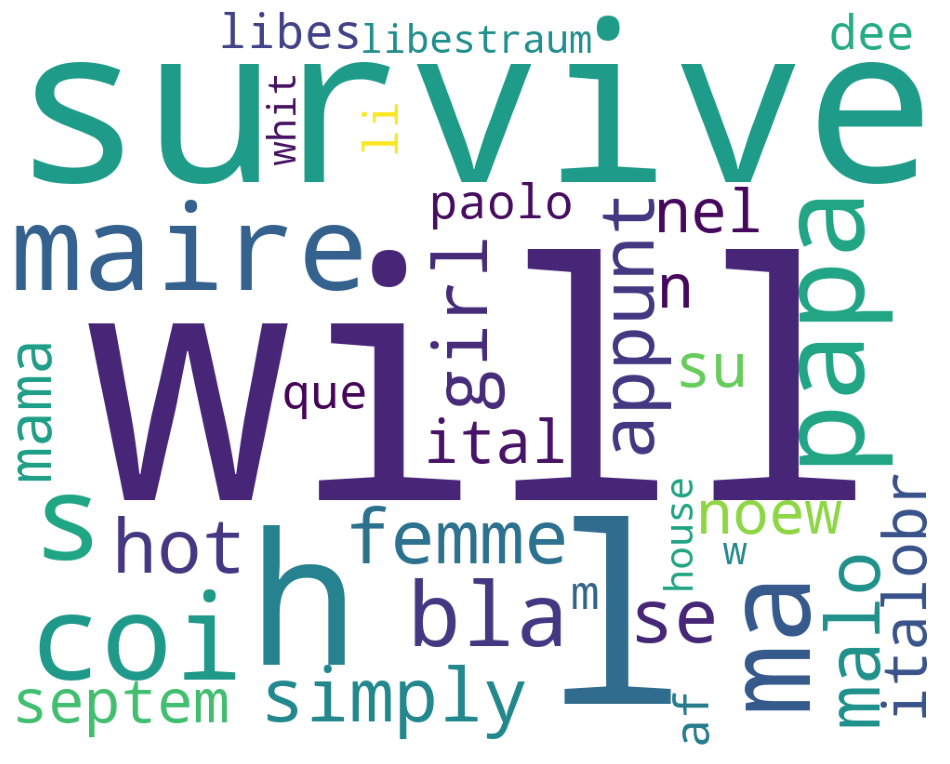

In [33]:
# display a frequency of words in world-cloud search history
word_cloud(search_queries['searchQuery'])

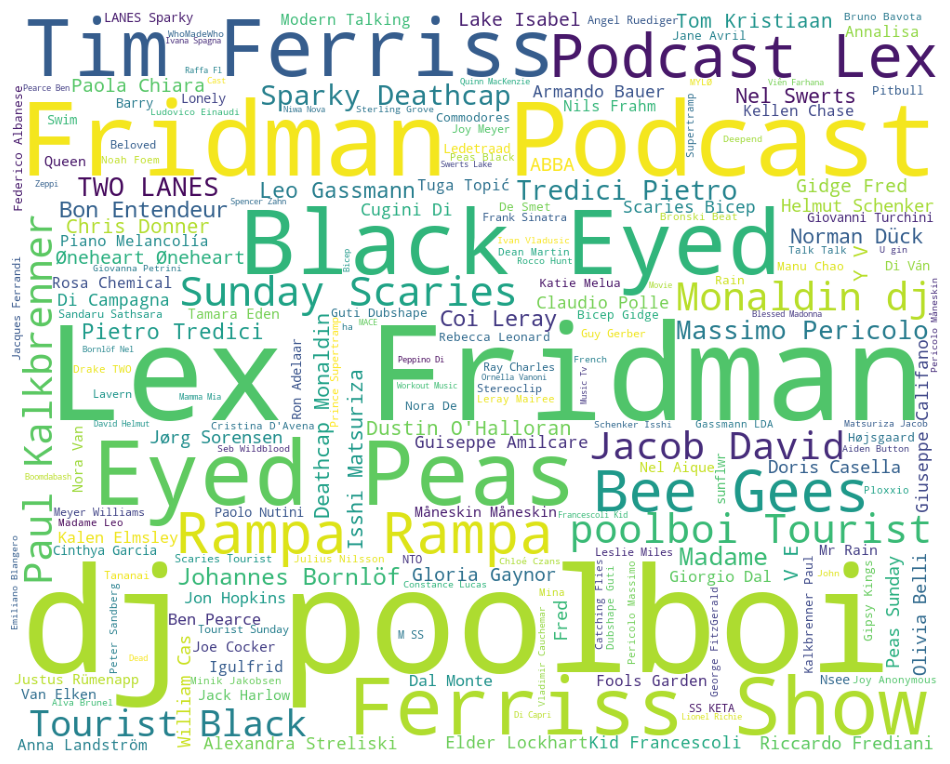

In [34]:
# display a frequency of words in world-cloud artist
word_cloud(streaming['artistName'])

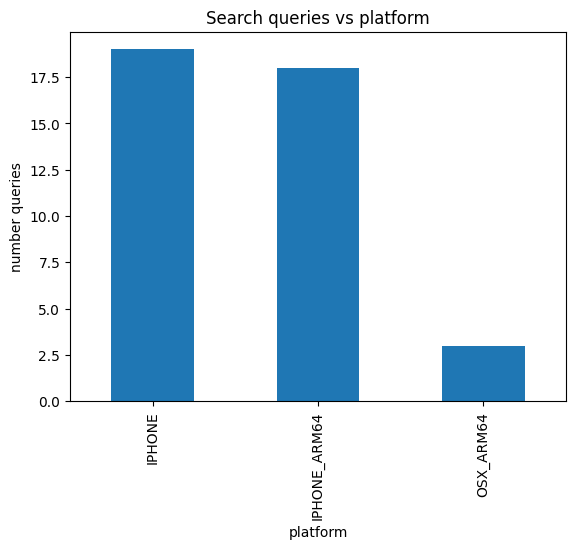

In [122]:
create_bar_chart(search_queries['platform'], "number queries", "platform", "Search queries vs platform")

C:\Users\Diego\AppData\Local\Temp\ipykernel_14496\1262615183.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = streaming.head(20).groupby('trackName').sum().reset_index()


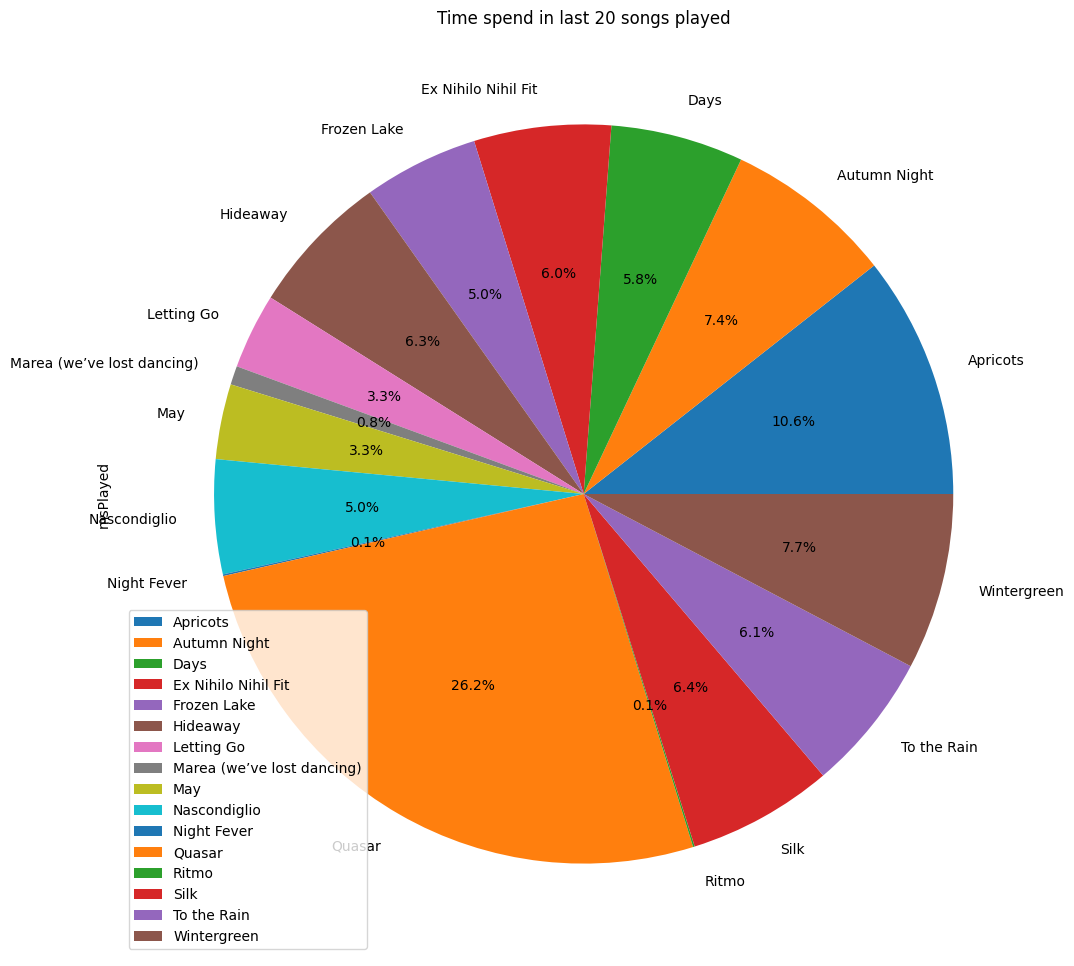

In [36]:
new_df = streaming.head(20).groupby('trackName').sum().reset_index()
create_pie_chart(new_df, 'trackName', 'msPlayed','Time spend in last 20 songs played')

C:\Users\Diego\AppData\Local\Temp\ipykernel_14496\3119369962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = streaming.head(20).groupby('artistName').sum().reset_index()


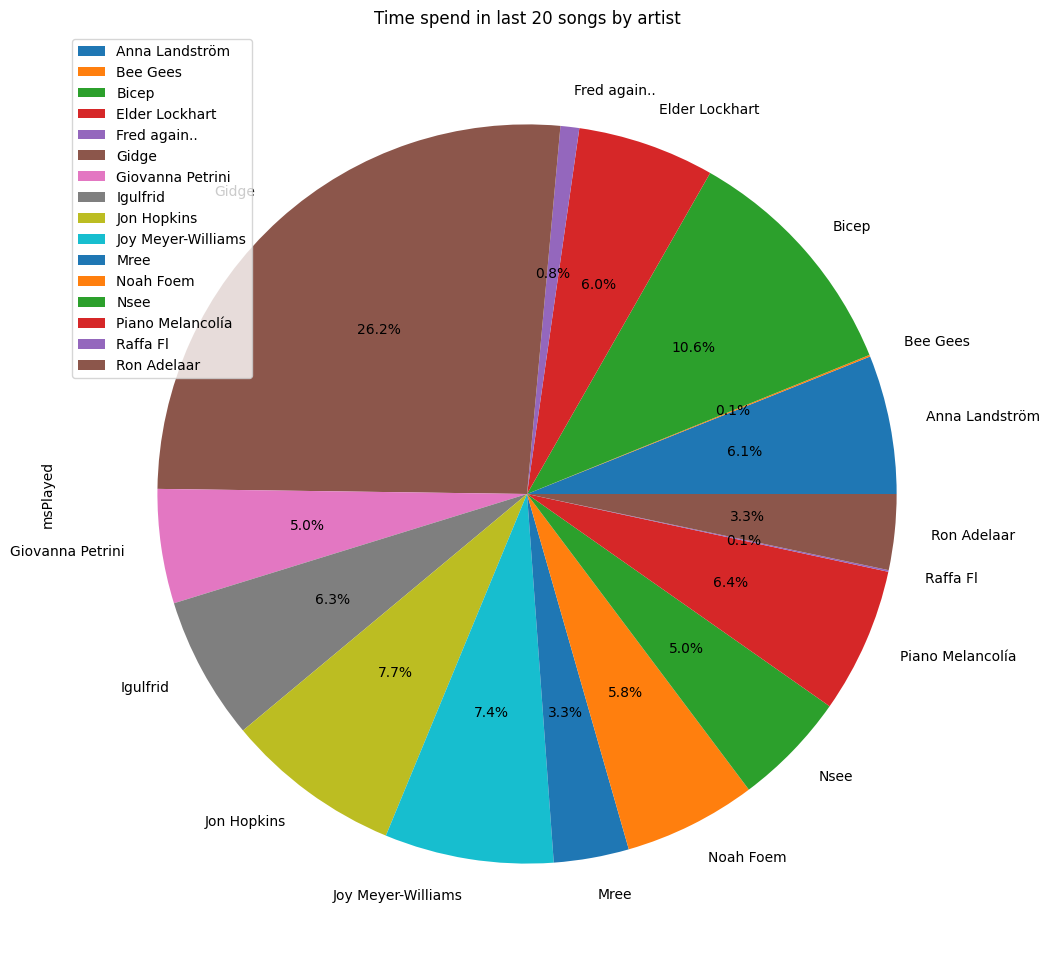

In [37]:
new_df = streaming.head(20).groupby('artistName').sum().reset_index()
create_pie_chart(new_df, 'artistName', 'msPlayed', 'Time spend in last 20 songs by artist')

# SPOTIFY API EXPLORATION


In [38]:
import requests

streaming.head(30)

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950
5,2023-01-05 16:33,Mree,May,76937
6,2023-01-05 16:36,Piano Melancolía,Silk,148835
7,2023-01-05 16:38,Elder Lockhart,Ex Nihilo Nihil Fit,140151
8,2023-01-05 16:40,Nsee,Frozen Lake,117443
9,2023-01-05 16:42,Noah Foem,Days,135859


In [39]:
def spotify_search_track(track_name: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/search?q=' + track_name + '&type=track', headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [40]:
def spotify_fetch_album(album_id: str, access_token: str):
    request = requests.get('https://api.spotify.com/v1/albums/' + album_id, headers={'Authorization': 'Bearer ' + access_token})
    return request.json()

In [102]:
#Exploration
access_token = "BQBkTe8IbXkx13mTFTvc1DPIFUI8hxy0Ya8_PaRxJxElDPTQOKE0_Geg3pwpobHRe16tGEcwD2Io7ws9rp0e4WqcBPTxo1-bVV-1uVVw2t4yFZKrxJ3v"
it = 0
def get_track_info(track_row):
    track_name = track_row["trackName"]
    req1 = spotify_search_track(track_name, access_token)
    #Check if we have a successful response
    if(req1 and 'tracks' in req1):
        tracks_results = req1['tracks']['items']
        first_result = tracks_results[0]
        id = first_result['id']
        track_info = {
            'id' : first_result['id'],
            'album_id': first_result['album']['id'],
            'album_name': first_result['album']['name'],
            'duration_ms' : first_result['duration_ms'],
            'popularity' : first_result['popularity'],
            'track_name': first_result['name'],
            'artists': list(map(lambda x: x['name'], first_result['artists'])),
            'msPlayed': track_row['msPlayed'],
            'endTime': track_row['endTime']
        }

        #Second API request for more information about the album (release date, genres)
        req2 = spotify_fetch_album(track_info['album_id'], access_token)
        if(req2):
            track_info['release_date'] = req2['release_date']
            track_info['genres'] = req2['genres']
            return pd.Series(track_info)
        




# Let's get the data for the Data frame then :)

In [101]:
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [103]:
# nb = len(streaming)
df = streaming.head(5)
df = df.apply(get_track_info, axis=1)
print("Result df: ", df)
df.to_csv(str(nb)+"-results.csv")


Result df:  0    None
1    None
2    None
3    None
4    None
dtype: object


In [43]:
!pip install spotipy --upgrade


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# replace with your own client ID and client secret from the Spotify Developer Dashboard
with open("secrets.txt") as file:
    client_id = file.readline()
    client_secret = file.readline()

# load the CSV file into a pandas DataFrame
results = pd.read_csv('10-results.csv')
results.head()

,Unnamed: 0,id,album_id,album_name,duration_ms,popularity,track_name,artists,msPlayed,endTime,release_date,genres
0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141966,2023-01-05 16:22,2022-05-20,[]
1,1,5eMUmyDeH1aayf1uZ0Wrga,2EqOuPPTOth7VS70I1kvta,Reflect the Day,65142,48,Autumn Nights,"['Slowberry', 'Fuzzy & Glad', 'blushful']",172896,2023-01-05 16:25,2020-10-05,[]
2,2,7EL9YtzL4qYOcxYlf4mbVi,2zXp7huP6HGVldywEC6arL,Yours to Break,211826,52,Wintergreen,['The East Pointers'],180531,2023-01-05 16:28,2019-10-25,[]
3,3,2HwCcCi8Up9NECNBRt0yTV,1Vhx6ow2PDJROoX3ND5dEy,Hideaway,148906,63,Hideaway,['Igulfrid'],146806,2023-01-05 16:30,2022-04-15,[]
4,4,763DOeT2XIrzMjbC3LLF5i,4TVVWsBh3tY8GXupSSoCc4,Lydian Fairytale,105786,67,Lydian Fairytale,['Nascondiglio'],116950,2023-01-05 16:32,2022-12-30,[]


In [60]:
data_retrieved = []
for track_id in results['id']:
    # set up authentication for the Spotify API
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # make the request to the Spotify API to get the audio features for the track
    audio_features = sp.audio_features(track_id)
    data_retrieved.append(audio_features[0])

frame_audio_features = pd.DataFrame(data_retrieved)
frame_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.464,0.06390,4,-26.028,0,0.0385,0.992,0.927000,0.0829,0.317,111.993,audio_features,025aQi6Ffw676y8m4zLPk7,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,0.780,0.00315,2,-32.727,0,0.3460,0.996,0.973000,0.1020,0.000,70.036,audio_features,5eMUmyDeH1aayf1uZ0Wrga,spotify:track:5eMUmyDeH1aayf1uZ0Wrga,https://api.spotify.com/v1/tracks/5eMUmyDeH1aa...,https://api.spotify.com/v1/audio-analysis/5eMU...,65143,4
2,0.560,0.73700,11,-7.655,1,0.0550,0.308,0.000005,0.0745,0.395,184.286,audio_features,7EL9YtzL4qYOcxYlf4mbVi,spotify:track:7EL9YtzL4qYOcxYlf4mbVi,https://api.spotify.com/v1/tracks/7EL9YtzL4qYO...,https://api.spotify.com/v1/audio-analysis/7EL9...,211827,3
3,0.356,0.01860,9,-26.729,1,0.0420,0.991,0.929000,0.0996,0.154,84.753,audio_features,2HwCcCi8Up9NECNBRt0yTV,spotify:track:2HwCcCi8Up9NECNBRt0yTV,https://api.spotify.com/v1/tracks/2HwCcCi8Up9N...,https://api.spotify.com/v1/audio-analysis/2HwC...,148907,4
4,0.428,0.02530,1,-29.558,1,0.0388,0.991,0.912000,0.1170,0.175,70.853,audio_features,763DOeT2XIrzMjbC3LLF5i,spotify:track:763DOeT2XIrzMjbC3LLF5i,https://api.spotify.com/v1/tracks/763DOeT2XIrz...,https://api.spotify.com/v1/audio-analysis/763D...,105787,4


In [57]:
#merge both datasets
merged_extra_info = pd.merge(results, frame_audio_features, on='id')
merged_extra_info.head()

,Unnamed: 0,id,album_id,album_name,duration_ms_x,popularity,track_name,artists,msPlayed,endTime,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141966,2023-01-05 16:22,...,0.927000,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,1,5eMUmyDeH1aayf1uZ0Wrga,2EqOuPPTOth7VS70I1kvta,Reflect the Day,65142,48,Autumn Nights,"['Slowberry', 'Fuzzy & Glad', 'blushful']",172896,2023-01-05 16:25,...,0.973000,0.1020,0.000,70.036,audio_features,spotify:track:5eMUmyDeH1aayf1uZ0Wrga,https://api.spotify.com/v1/tracks/5eMUmyDeH1aa...,https://api.spotify.com/v1/audio-analysis/5eMU...,65143,4
2,2,7EL9YtzL4qYOcxYlf4mbVi,2zXp7huP6HGVldywEC6arL,Yours to Break,211826,52,Wintergreen,['The East Pointers'],180531,2023-01-05 16:28,...,0.000005,0.0745,0.395,184.286,audio_features,spotify:track:7EL9YtzL4qYOcxYlf4mbVi,https://api.spotify.com/v1/tracks/7EL9YtzL4qYO...,https://api.spotify.com/v1/audio-analysis/7EL9...,211827,3
3,3,2HwCcCi8Up9NECNBRt0yTV,1Vhx6ow2PDJROoX3ND5dEy,Hideaway,148906,63,Hideaway,['Igulfrid'],146806,2023-01-05 16:30,...,0.929000,0.0996,0.154,84.753,audio_features,spotify:track:2HwCcCi8Up9NECNBRt0yTV,https://api.spotify.com/v1/tracks/2HwCcCi8Up9N...,https://api.spotify.com/v1/audio-analysis/2HwC...,148907,4
4,4,763DOeT2XIrzMjbC3LLF5i,4TVVWsBh3tY8GXupSSoCc4,Lydian Fairytale,105786,67,Lydian Fairytale,['Nascondiglio'],116950,2023-01-05 16:32,...,0.912000,0.1170,0.175,70.853,audio_features,spotify:track:763DOeT2XIrzMjbC3LLF5i,https://api.spotify.com/v1/tracks/763DOeT2XIrz...,https://api.spotify.com/v1/audio-analysis/763D...,105787,4


In [58]:
merged_extra_info.to_csv("extra_info.csv")

In [89]:
#load data extra info and clean data
results = pd.read_csv('extra_info.csv')
results.head()

,Unnamed: 0.1,Unnamed: 0,id,album_id,album_name,duration_ms_x,popularity,track_name,artists,msPlayed,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141966,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
1,1,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141966,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
2,2,0,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141966,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
3,3,49,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141955,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4
4,4,49,025aQi6Ffw676y8m4zLPk7,30HSC1ogeWpwBZXroMTTDW,To the Rain,145620,59,To the Rain,['Anna Landström'],141955,...,0.927,0.0829,0.317,111.993,audio_features,spotify:track:025aQi6Ffw676y8m4zLPk7,https://api.spotify.com/v1/tracks/025aQi6Ffw67...,https://api.spotify.com/v1/audio-analysis/025a...,145621,4


In [162]:
drop_columns = ["Unnamed: 0.1","Unnamed: 0","uri", "track_href", "analysis_url", "duration_ms_y", "type","duration_ms_x"]
extra_results = results.drop(drop_columns , axis=1)

extra_results['endTime'] = pd.to_datetime(extra_results['endTime'])
extra_results['endTime'] = extra_results['endTime'].dt.strftime('%Y-%m-%d')

extra_results.describe()

,popularity,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,57.288809,159677.344765,0.478899,0.267617,5.637184,-20.471832,0.554152,0.059738,0.678073,0.709608,0.134679,0.255622,113.116195,3.776173
std,13.472213,93259.827692,0.190964,0.300914,3.455759,9.942518,0.497508,0.062155,0.376836,0.360014,0.108116,0.203991,26.122797,0.558099
min,2.000000,278.000000,0.130000,0.000860,0.000000,-38.342000,0.000000,0.024800,0.000033,0.000000,0.048200,0.000000,52.158000,1.000000
25%,50.000000,117475.000000,0.319000,0.028900,2.000000,-28.707000,0.000000,0.035500,0.289000,0.801000,0.096800,0.103000,96.604000,4.000000
50%,59.000000,145274.000000,0.421000,0.090200,5.000000,-23.353000,1.000000,0.042400,0.903000,0.907000,0.110000,0.177000,117.002000,4.000000
75%,65.000000,180531.000000,0.642000,0.564000,9.000000,-10.002000,1.000000,0.052200,0.991000,0.934000,0.116000,0.318000,129.894000,4.000000
max,87.000000,440228.000000,0.964000,0.922000,11.000000,-4.063000,1.000000,0.421000,0.996000,0.973000,0.712000,0.964000,206.686000,5.000000


In [163]:
grouped = extra_results.groupby('endTime').sum()
# grouped_normalised = grouped / grouped.sum()
grouped_normalised = grouped
grouped_normalised.head()

C:\Users\Diego\AppData\Local\Temp\ipykernel_14496\2218286013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = extra_results.groupby('endTime').sum()


,popularity,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
endTime,,,,,,,,,,,,,,
2023-01-05,1445,3286151,10.934,5.09345,176,-550.709,17,1.3645,19.287400,17.410903,2.6293,5.5278,2712.731,93
2023-01-06,24264,71443260,208.890,119.25274,2378,-8522.907,248,25.1248,280.599353,300.977277,59.9961,108.6815,47721.817,1609
2023-01-07,6029,13731838,45.486,23.91368,569,-2267.779,42,6.6055,75.765900,74.734488,11.9865,27.4054,12231.824,390


<AxesSubplot: title={'center': 'Your sentiment in the last days'}, xlabel='endTime', ylabel='happines value'>

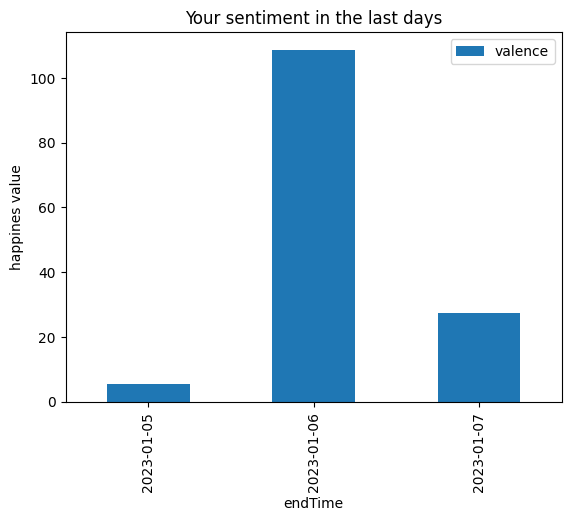

In [164]:
grouped_normalised.plot(kind='bar',y=["valence"],ylabel="happines value", title="Your sentiment in the last days")

<AxesSubplot: xlabel='popularity'>

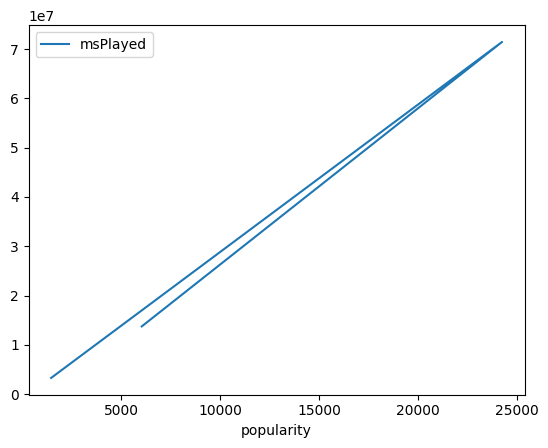

In [166]:
grouped_normalised.plot(kind='scatter', x='popularity', y='msPlayed')
